In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as p
from datetime import datetime as dt
import matplotlib.pyplot as plt
from pandas_ta import ema

Import data.

In [2]:
input_file = "AAPL.csv"
data = p.read_csv(input_file)
print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


In [3]:
dates = data[["Date"]]
data.set_index(p.DatetimeIndex(data['Date']), inplace=True)
data = data[["Volume"]]
print(data)

               Volume
Date                 
1980-12-12  469033600
1980-12-15  175884800
1980-12-16  105728000
1980-12-17   86441600
1980-12-18   73449600
...               ...
2022-05-31  103718400
2022-06-01   74286600
2022-06-02   72348100
2022-06-03   88471400
2022-06-06   71490300

[10459 rows x 1 columns]


In [4]:
data.ta.ema(close="volume",length = 500, append = True)
print(data)

               Volume       EMA_500
Date                               
1980-12-12  469033600           NaN
1980-12-15  175884800           NaN
1980-12-16  105728000           NaN
1980-12-17   86441600           NaN
1980-12-18   73449600           NaN
...               ...           ...
2022-05-31  103718400  1.042416e+08
2022-06-01   74286600  1.041221e+08
2022-06-02   72348100  1.039952e+08
2022-06-03   88471400  1.039332e+08
2022-06-06   71490300  1.038037e+08

[10459 rows x 2 columns]


In [5]:
#remove n rows
n = 500
data = data.iloc[n:]
dates = dates.iloc[n:]
print(data)

               Volume       EMA_500
Date                               
1982-12-06  146585600  5.755675e+07
1982-12-07  167283200  5.799478e+07
1982-12-08  112313600  5.821162e+07
1982-12-09  194656000  5.875631e+07
1982-12-10  167484800  5.919036e+07
...               ...           ...
2022-05-31  103718400  1.042416e+08
2022-06-01   74286600  1.041221e+08
2022-06-02   72348100  1.039952e+08
2022-06-03   88471400  1.039332e+08
2022-06-06   71490300  1.038037e+08

[9959 rows x 2 columns]


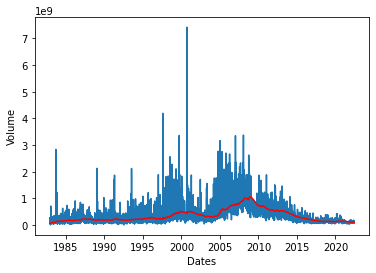

In [6]:
plt.plot(data[["Volume"]])
plt.plot(data[["EMA_500"]], color="red")
plt.plot()
plt.xlabel("Dates")
plt.ylabel("Volume")
plt.show()



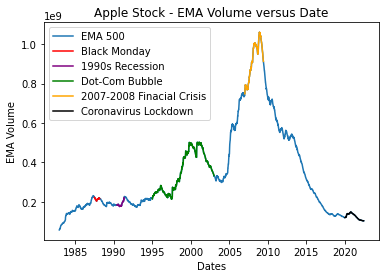

In [7]:
#Actual Plot
plt.plot(data[["EMA_500"]])
plt.xlabel("Dates")
plt.ylabel("EMA Volume")
plt.title("Apple Stock - EMA Volume versus Date")

#Create line plots for recessions
data_used = data[["EMA_500"]]
black_monday_1980 = data_used["1987-07-01":"1988-03-01"]
plt.plot(black_monday_1980, c = "red")

recession_1990s = data_used["1990-06-01":"1991-05-01"]
plt.plot(recession_1990s, c = "purple")

dot_cot_bubble = data_used["1995-01-01":"2002-12-31"]
plt.plot(dot_cot_bubble, c="green")

financial_crisis_2008 = data_used["2007-01-01":"2009-6-1"]
plt.plot(financial_crisis_2008, c = "orange")

corona = data_used["2020-01-01":]
plt.plot(corona, c = "black")

recessions = ["EMA 500", "Black Monday", "1990s Recession", 
"Dot-Com Bubble", "2007-2008 Finacial Crisis", "Coronavirus Lockdown"]
plt.legend(recessions)

plt.show()

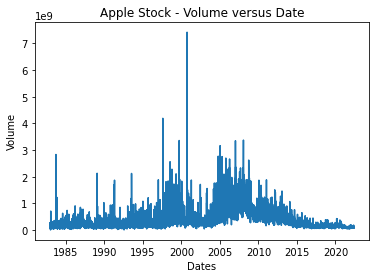

In [8]:

plt.plot(data[["Volume"]])
plt.xlabel("Dates")
plt.ylabel("Volume")
plt.title("Apple Stock - Volume versus Date")
plt.show()